## **$Sin$ Wave**

$$
s(t)=A_0\sin(2\pi f t+\phi)
$$

---

In [87]:
import numpy as np
from scipy.io.wavfile import write
from IPython.display import Audio

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [88]:
sr  = 44100   # sample rate
dr  = 1       # duration
fq  = 800     # frequency in Hz
amp = 0.5     # amplitude

timev  = np.linspace(0, dr, dr*sr)
signal = amp*np.sin(2*np.pi*fq*timev)

x = np.fft.fft(signal)
x_mag = np.abs(x) / sr*2

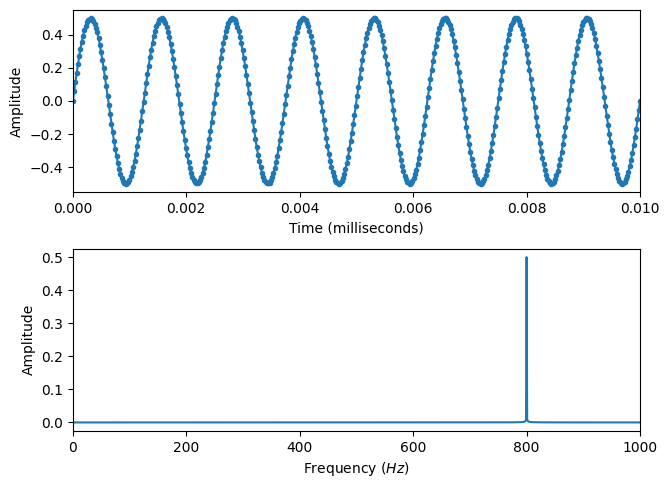

In [89]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(h_pad=2)

ax1.plot(timev, signal, '.-')
ax1.set_xlabel('Time (milliseconds)')
ax1.set_ylabel('Amplitude')
ax1.set_xscale('linear')
ax1.set_xlim(0, 0.01)

ax2.plot(x_mag)
ax2.set_xlabel('Frequency ($Hz$)')
ax2.set_ylabel('Amplitude')
ax2.set_xscale('linear')
ax2.set_xlim(0, 1000)

plt.show()

In [90]:
sin_sound = np.int16(signal*32767)

write('sin_sound.wav', 44100, sin_sound)
Audio(data='sin_sound.wav')